$$MDI505-Exam1$$

Chunyan Yuan

***

1. (a) Using these data and Matthiessen's rule, determine the Nordheim coefficient C for these Cu-Sn alloys.

***

In [146]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [147]:
data = pd.read_csv('Cu-Sn-alloy-properties.csv', header=0, index_col=None)

x = data.iloc[:, 2].values
y = data.iloc[:, 3].values

x = x * (1-x)

In [148]:
phi = np.mat(np.zeros([data.shape[0], 2]))
phi[:, 0] = np.ones(data.shape[0]).reshape(-1, 1)
phi[:, 1] = x.reshape(-1, 1)

theta_ls = np.linalg.lstsq(phi, y, rcond=None)[0]

x_fit = np.linspace(min(x), max(x), 100)
y_fit = theta_ls[0] + theta_ls[1] * x_fit

print(np.round(theta_ls[0], 3))
print(np.round(theta_ls[1], 3))

17.164
2671.861


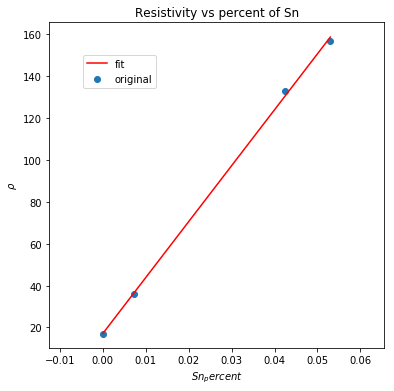

In [149]:
plt.figure(figsize=[6, 6])
plt.scatter(x, y, label="original")
plt.plot(x_fit, y_fit, color="red", label="fit")
plt.legend(bbox_to_anchor=(0.1, 0.4, 0.4, 0.5), loc='upper left',ncol=1, borderaxespad=0.)
plt.title("Resistivity vs percent of Sn")
plt.xlabel(r"$Sn_percent$")
plt.ylabel(r"$\rho$")
plt.show()

***

The Nordheim coefficient C is 2671.861.

***

(b) Based on your regression for part (a), what is the resistivity of pure copper? What should be the resistivity of an alloy containing 3 atomic % Sn (X=0.03)?


***

In [150]:
print('y = ' + str(theta_ls[0]) + " + " + str(theta_ls[1]) + '* x')
y_003 = round(theta_ls[0] + theta_ls[1] * 0.03 , 3)
print('The resistivity of an alloy containing 3 atomic % Sn (X=0.03) is '+ str(y_003))

y = 17.164385477312607 + 2671.8607388142586* x
The resistivity of an alloy containing 3 atomic % Sn (X=0.03) is 97.32


The resistivity of pure copper is 17.1 nOhm m.
The resistivity of an alloy containing 3 atomic % Sn (X=0.03) is 97.32.

***

(c) The Wiedemann-Franz law says thermal conductivity and electrical conductivity are related by kappa/sigma = $C_{WF}T$. Plot this relation and determine the constant $C_{WF}$ in units of W Ω K-2.

***

The constant cwf is[0.592]


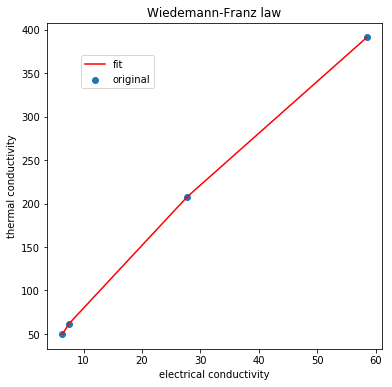

In [151]:
sigma = data.iloc[:, 4].values
kappa = data.iloc[:, 5].values

phi = np.mat(np.zeros([len(sigma), 1]))
phi[:, 0] = np.ones(len(kappa)).reshape(-1, 1)

theta_ls = np.linalg.lstsq(phi, kappa, rcond=None)[0]

x_fit = np.linspace(min(sigma), max(sigma), 100)
y_fit = theta_ls * x_fit

c_wf = np.round(theta_ls/300, 3)

print('The constant cwf is' + str(c_wf))

plt.figure(figsize=[6, 6])
plt.scatter(sigma, kappa, label="original")
plt.plot(sigma, kappa, color="red", label="fit")
plt.legend(bbox_to_anchor=(0.1, 0.4, 0.4, 0.5), loc='upper left',ncol=1, borderaxespad=0.)
plt.title("Wiedemann-Franz law")
plt.xlabel("electrical conductivity")
plt.ylabel("thermal conductivity")
plt.show()

***

The constant $𝐶_{𝑊𝐹}$ is 0.592 $WΩK^{-2}$.

***

***

2(a) Using only the data from the MD calculation, recalculate the constant $C_{WF}$? Does this agree with the result of problem 1? If no then what are the likely causes for differences, and if yes then explain why MD is sufficient?

***

In [152]:
data = pd.read_csv('mdi505-exam1-question-2.csv', header=0, index_col=None)
data = data.iloc[:10, :].values

sigma = data[:, 1].reshape(-1, 1)
kappa = data[:, 2].reshape(-1, 1)
sigma = sigma.astype(float)
kappa = kappa.astype(float)

b = np.ones(len(sigma)).reshape(-1, 1)
phi = np.hstack((sigma, b))

theta_ls = np.linalg.lstsq(phi, kappa, rcond=None)[0]

x_fit = np.linspace(min(sigma), max(sigma), 100)
y_fit = theta_ls[0] * x_fit + theta_ls[1]

c_wf = np.round(theta_ls[0]/300, 3)

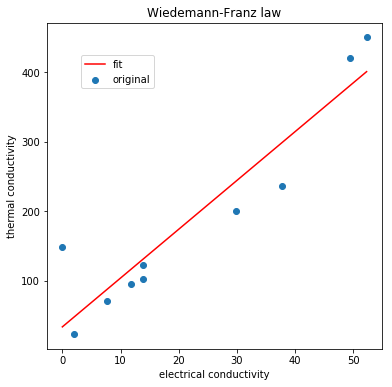

In [153]:
plt.figure(figsize=[6, 6])
plt.scatter(sigma, kappa, label="original")
plt.plot(x_fit, y_fit, color="red", label="fit")
plt.legend(bbox_to_anchor=(0.1, 0.4, 0.4, 0.5), loc='upper left',ncol=1, borderaxespad=0.)
plt.title("Wiedemann-Franz law")
plt.xlabel("electrical conductivity")
plt.ylabel("thermal conductivity")
plt.show()

***

The constant $𝐶_{𝑊𝐹}$ is 0.623 $WΩK^{-2}$.
This disagree with the result of problem 1.
One of the reasons is that the potential is truncated by the setting up of cut-off distance, which lead to the ignoration all interactions for separations r > $r_c$

***

(b) What relationships do you identify between the chemistry and the trend with conductivity, ie. what about chemistry shows noticeable impact on model results?

***

Generally speaking, more holes, the higher conductivity. For carbon and silicon, the number of the electrons in the outer shell are both four, and each one would pair with electrons from carbon atoms around, so that the outer shell will be filled with eight electrons and no holes. In that case, electrons need more energy to find and move to another spot, so the conductivity is extremely low. In contrast, for metals like copper, aluminum, Nicole and so on, their outer shells are not fully-filled, which means they have more holes, so the conductivity is higher.

***

(c) Using the data for Cu and Sn, predict the thermal and electrical conductivities of the compositions from problem 1. What are possible explanations for any deviations from the
experimental data, and if there are no deviations then why is MD able to correctly model the property values?

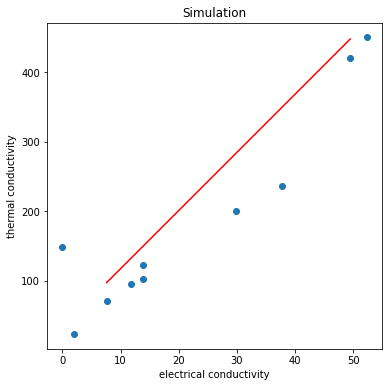

In [154]:
sigma_sim = data[[6, 9], 1].reshape(-1, 1)
kappa_sim = data[[6, 9], 2].reshape(-1, 1)
sigma_sim = sigma_sim.astype(float)
kappa_sim = kappa_sim.astype(float)

b_sim = np.ones(len(sigma_sim)).reshape(-1, 1)
phi_sim = np.hstack((sigma_sim, b_sim))

theta_ls_sim = np.linalg.lstsq(phi_sim, kappa_sim, rcond=None)[0]

x_fit_sim = np.linspace(min(sigma_sim), max(sigma_sim), 100)
y_fit_sim = theta_ls[1] + theta_ls_sim[0] * x_fit_sim

plt.figure(figsize=[6, 6])
plt.scatter(sigma, kappa)
plt.plot(x_fit_sim, y_fit_sim, color="red")
plt.title("Simulation")
plt.xlabel("electrical conductivity")
plt.ylabel("thermal conductivity")
plt.show()

In [155]:
data_real = pd.read_csv('Cu-Sn-alloy-properties.csv', header=0, index_col=None)
sigma_real = data_real.iloc[:, 4].values.reshape(-1, 1)
kappa_real = data_real.iloc[:, 5].values.reshape(-1, 1)

y_fit_kappa = theta_ls[1] + theta_ls_sim[0] * sigma_real

difference = y_fit_kappa - kappa_real
print(difference)

[[132.80070458]
 [ 58.25655142]
 [ 34.31244641]
 [ 36.67086128]]


Data of the thermal conductivity(kappa) gotten from the simulation results show deviations from the real value. The difference is 132.8, 58.3, 34,3, 36.7 respectively corresponding to the value in problem 1 in order. The deviation may lie in the simulation periodic boundary condition, which ignores the interaction beyond the cutoff distance.

***

***

3. We will consider the Cu-Ar system. The Lennard-Jones parameters for Ar are σ = 0.341 nm and ε = 119.8 K, and for Cu σ = 0.227 nm and ε = 6765.4 K.

(a) Using the code developed in homework 3, estimate the lattice parameter and energy for an Ar- Cu system in the fcc-like and the bcc-like structure for 25% and 50% of Ar (assume solid solution and 0 K conditions).

In [156]:
kb = 1.38 * (10 ** -23)
imcl_ar = 119.8 * kb
imcl_cu = 6765.4 * kb
imcl = np.sqrt(imcl_ar * imcl_cu)
sigma_ar = 0.341
sigma_cu = 0.227
sigma = np.sqrt(sigma_ar * sigma_cu)

In [157]:
def fccsum1(a, nc, rc):
    n = 4
    r = np.array([[0, 0, 0], [0.5, 0.5, 0], [0, 0.5, 0.5], [0.5, 0, 0.5]])
    ucell = 0

    for k in range(-nc, nc):
        for l in range(-nc, nc):
            for m in range(-nc, nc):
                for i in range(n):
                    for j in range(n):

                        dist = a * np.sqrt((k+r[j, 0] - r[i, 0])**2 + (l+r[j, 1] - r[i, 1])**2 + (m+r[j, 2]-r[i, 2])**2)

                        if dist > 0 and dist <= rc:

                            if i == 0 and j == 0:
                                u = 2 * 4 * imcl_ar * ((sigma_ar / dist) ** 12 - (sigma_ar / dist) ** 6)
                            elif i!= 0 and j!= 0:
                                u = 2 * 4 * imcl_cu * ((sigma_cu / dist) ** 12 - (sigma_cu / dist) ** 6)
                            else:
                                u = 2 * 4 * imcl * ((sigma / dist) ** 12 - (sigma / dist) ** 6)

                        else:
                            u = 0

                        ucell = ucell + u

    ucell = ucell / n

    return ucell


In [158]:
a = np.linspace(0.3, 1, 100)
u_fcc = np.array([fccsum1(t, 7, 6) for t in a])

min_u_fcc = np.min(u_fcc)
min_u_x_fcc = a[int(np.argwhere(u_fcc == min_u_fcc))]

print('The location of minimum energy' + str(min_u_x_fcc))
print('The minimum energy' + str(min_u_fcc))

The location of minimum energy0.38484848484848483
The minimum energy-1.3568838330094452e-18


The location of minimum energy of fcc material is 0.385 nm.
The minimum energy of fcc material is-1.357e-18 J.

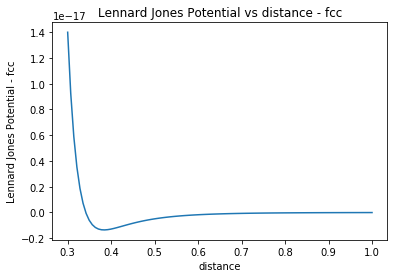

In [159]:
plt.figure()
plt.plot(a, u_fcc)
plt.xlabel('distance')
plt.ylabel('Lennard Jones Potential - fcc')
plt.title('Lennard Jones Potential vs distance - fcc')
plt.savefig('Lennard Jones Potential vs distance - fcc')

In [160]:
def bccsum1(a, nc, rc):
    n = 2
    r = np.array([[0, 0, 0], [0.5, 0.5, 0.5]])
    ucell_bcc = 0

    for k in range(-nc, nc):
        for l in range(-nc, nc):
            for m in range(-nc, nc):
                for i in range(n):
                    for j in range(n):
                        dist = a * np.sqrt((k + r[j, 0] - r[i, 0])**2 + (l + r[j, 1] - r[i, 1]) ** 2 + (m + r[j, 2] - r[i, 2])**2)

                        if dist > 0 and dist <= rc:

                            if i == 0 and j == 0:
                                u = 2 * 4 * imcl_ar * ((sigma_ar / dist) ** 12 - (sigma_ar / dist) ** 6)
                            elif i != 0 and j != 0:
                                u = 2 * 4 * imcl_cu * ((sigma_cu / dist) ** 12 - (sigma_cu / dist) ** 6)
                            else:
                                u = 2 * 4 * imcl * ((sigma / dist) ** 12 - (sigma / dist) ** 6)

                        else:
                            u = 0

                        ucell_bcc = ucell_bcc + u

    ucell_bcc = ucell_bcc / n
    
    return ucell_bcc


In [161]:
a = np.linspace(0.3, 1, 100)

u_bcc = np.array([bccsum1(t, 4, 6) for t in a])

min_u_bcc = np.min(u_bcc)
min_u_x_bcc = a[int(np.argwhere(u_bcc == min_u_bcc))]

print('The location of minimum energy-bcc is ' + str(min_u_x_bcc))
print('The minimum energy-bcc is' + str(min_u_bcc))

The location of minimum energy-bcc is 0.3424242424242424
The minimum energy-bcc is-4.818947924098168e-19


The location of minimum energy of bcc material is 0.342 nm.
The minimum energy of bcc material is -4.819e-19 J.

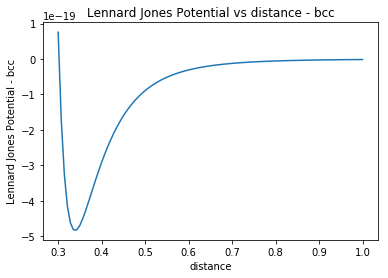

In [162]:
plt.figure()
plt.plot(a, u_bcc)
plt.xlabel('distance')
plt.ylabel('Lennard Jones Potential - bcc')
plt.title('Lennard Jones Potential vs distance - bcc')
plt.savefig('Lennard Jones Potential vs distance - bcc')
plt.show()

(b)  What modifications would be necessary in order to perform these calculations at non-zero temperatures.

At non-zero temperature, the atoms will vibrate, so the motion, the momenta and the kinetic energy have to be considered as parameters in the simulation.

***

***

4. In class, we developed a random walk code to model the behavior of a particle through different crystal lattices. Let us now build on this by considering an applied external field along the x- direction, which causes atoms to be two times more likely to move in the +x than the –x direction.

(a) How far from the original starting point on average is an atom after 1,000 jumps in a BCC lattice?

In [163]:
def random_cubic_bcc_3d(n):

    delx = [0.5, 0.5, 0.5, 0.5, -0.5, -0.5, -0.5, -0.5, 0.5, 0.5, 0.5, 0.5]
    dely = [0.5, 0.5, -0.5, -0.5, 0.5, 0.5, -0.5, -0.5, 0.5, 0.5, -0.5, -0.5]
    delz = [0.5, -0.5, 0.5, -0.5, 0.5, -0.5, 0.5, -0.5, 0.5, -0.5, 0.5, -0.5]

    x = np.zeros(n)
    y = np.zeros(n)
    z = np.zeros(n)
    rs2 = np.zeros(n)

    val = np.random.randint(0, 11, n)

    for j in range(1, n):
        x[j] = x[j-1] + delx[val[j]]
        y[j] = y[j-1] + dely[val[j]]
        z[j] = z[j-1] + delz[val[j]]
        rs2[j] = x[j]**2 + y[j]**2 + z[j]**2

    return x, y, z, rs2

In [164]:
def arw(nt, nd):
    rwa = np.zeros(nt)
    sig = np.zeros(nt)
    ree = np.zeros(nd)

    for j in range(1, nd+1):
        x, y, z, rs2 = random_cubic_bcc_3d(nt)

        for k in range(0, nt):
            rwa[k] += rs2[k]
            sig[k] += rs2[k]**2

        ree[j-1] = np.sqrt(x[nt-1] ** 2 + y[nt-1] ** 2 + z[nt-1] ** 2)

    for j in range(1, nt):
        rwa[j] = rwa[j]/nd
        sig[j] = (sig[j]/nd - rwa[j] ** 2)/rwa[j] ** 2

    return rwa, sig, ree


rwa, sig, ree = arw(1000, 500)

In [165]:
print('Distance = ' + str(np.mean(ree)))

Distance = 151.2115126741818


***

The average distance of atom after 1,000 jumps in a BCC lattice is 153.46.

***

(b) Provide the graphs of mean square displacement and standard deviation versus number of jumps. Are there any significant differences between what we saw in the case with unbiased motion.

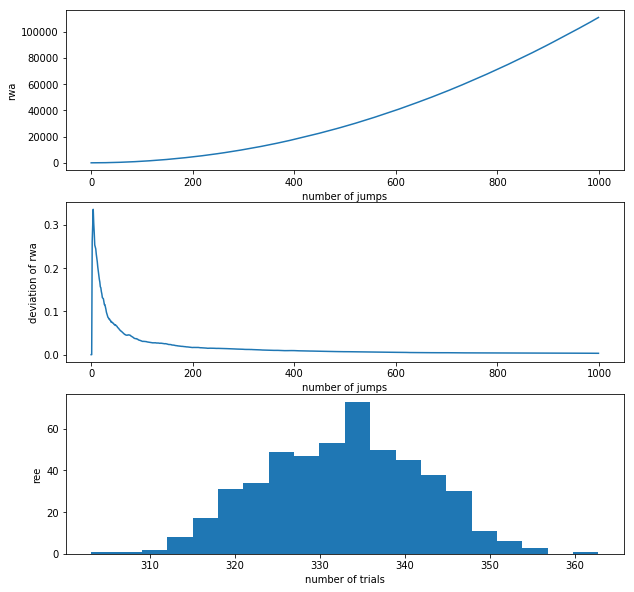

In [168]:
plt.figure(figsize=[10, 10])
plt.subplot(311)
plt.plot(rwa)
plt.xlabel('number of jumps')
plt.ylabel('rwa')
plt.subplot(312)
plt.plot(sig)
plt.xlabel('number of jumps')
plt.ylabel('deviation of rwa')
plt.subplot(313)
plt.hist(ree, bins=20)
plt.xlabel('number of trials')
plt.ylabel('end to end distance')
plt.show()

Are there any significant differences between what we saw in the case with unbiased motion.

In [167]:
# without electrical field

def random_cubic_3d(n):

    delx = [0.5, 0.5, 0.5, 0.5, -0.5, -0.5, -0.5, -0.5]
    dely = [0.5, 0.5, -0.5, -0.5, 0.5, 0.5, -0.5, -0.5]
    delz = [0.5, -0.5, 0.5, -0.5, 0.5, -0.5, 0.5, -0.5]

    x = np.zeros(n)
    y = np.zeros(n)
    z = np.zeros(n)
    rs2 = np.zeros(n)

    val = np.random.randint(0, 5, n)

    for j in range(1, n):
        x[j] = x[j-1] + delx[val[j]]
        y[j] = y[j-1] + dely[val[j]]
        z[j] = z[j-1] + delz[val[j]]
        rs2[j] = x[j]**2 + y[j]**2 + z[j]**2

    return x, y, z, rs2


def arw(nt, nd):
    rwa = np.zeros(nt)
    sig = np.zeros(nt)
    ree = np.zeros(nd)

    for j in range(1, nd+1):
        x, y, z, rs2 = random_cubic_3d(nt)

        for k in range(0, nt):
            rwa[k] += rs2[k]
            sig[k] += rs2[k]**2

        ree[j-1] = np.sqrt(x[nt-1] ** 2 + y[nt-1] ** 2 + z[nt-1] ** 2)

    for j in range(1, nt):
        rwa[j] = rwa[j]/nd
        sig[j] = (sig[j]/nd - rwa[j] ** 2)/rwa[j] ** 2

    return rwa, sig, ree


rwa, sig, ree = arw(1000, 500)
distance_original = np.mean(ree)
print('distance without electrical field' + str(round(distance_original,2)))

distance without electrical field332.69


The difference lies in the average end-to-end distance. The average end-to-end distance of unbiased motion is 332.55, in contrast, with electrical field, the value is 153.46.

***